<a href="https://colab.research.google.com/github/cgpan/predict_stock_lstm/blob/main/Predict_the_Stock_Price_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1. Stock Data Management Using Yfinance

In [ ]:
# Since the google's remote server does not have a module called yfinance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 59.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## 1.0 install and import the module yfinance

see this page for more tutorials https://analyzingalpha.com/yfinance-python

In [ ]:
import yfinance as yf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## 2.0 get the stock price data using .history()

关于.history()的source code 可以提供各种参数的介绍，可以点击上述网址

In [ ]:
# make sure the ticker's code, like "AAPL" for aplle inc.
apple_ticker = yf.Ticker("AAPL")
# by default the .history() will give one month daily price of a ticker
apple_1mon = apple_ticker.history()

In [ ]:
apple_1mon.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-09,147.080002,147.949997,142.529999,142.639999,69473000,0,0
2022-06-10,140.279999,140.759995,137.059998,137.130005,91437900,0,0
2022-06-13,132.869995,135.199997,131.440002,131.880005,122207100,0,0
2022-06-14,133.130005,133.889999,131.479996,132.759995,84784300,0,0
2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000,0,0


In [ ]:
apple_1mon.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-01,136.039993,139.039993,135.660004,138.929993,71007500,0,0
2022-07-05,137.770004,141.610001,136.929993,141.559998,73353800,0,0
2022-07-06,141.350006,144.119995,141.080002,142.919998,74064300,0,0
2022-07-07,143.289993,146.550003,143.279999,146.350006,66253700,0,0
2022-07-08,145.259995,147.550003,145.000000,147.039993,64493200,0,0


In [ ]:
apple = apple_ticker.history(period="10y", interval="1d", end="2022-07-08")

In [ ]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-07-09,18.483653,18.746265,18.447315,18.745960,379405600,0.0,0.0
2012-07-10,18.870549,18.928569,18.483959,18.572515,511957600,0.0,0.0
2012-07-11,18.508698,18.555724,18.236925,18.457092,469322000,0.0,0.0
2012-07-12,18.329148,18.427780,18.098293,18.288229,428041600,0.0,0.0
2012-07-13,18.411897,18.541369,18.321814,18.473579,311427200,0.0,0.0


In [ ]:
apple.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-01,136.039993,139.039993,135.660004,138.929993,71007500,0.0,0.0
2022-07-05,137.770004,141.610001,136.929993,141.559998,73353800,0.0,0.0
2022-07-06,141.350006,144.119995,141.080002,142.919998,74064300,0.0,0.0
2022-07-07,143.289993,146.550003,143.279999,146.350006,66253700,0.0,0.0
2022-07-08,145.259995,147.550003,145.000000,147.039993,64493200,0.0,0.0


In [ ]:
type(apple)

pandas.core.frame.DataFrame

In [ ]:
# note. yfinance 返回的值是将date作为默认索引列
apple = apple.reset_index(level="Date")

In [ ]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [ ]:
apple.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

## 3.0 Plot the ticker's price using matplotlib

find matplotlib documentation on https://matplotlib.org/stable/index.html

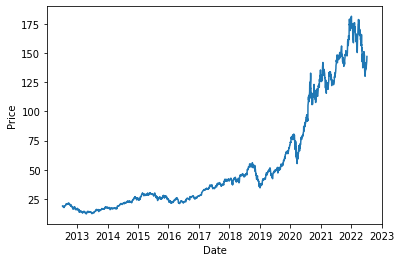

In [ ]:
plt.plot(apple["Date"], apple["Close"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## 4.0 Data Management

### 4.1 Change data frame to use prices n days before to predict the target day's

Since we only care about the close price and the date, so we will remove all other variables.
In lstm we use the previous 3 days to predict the 4th day's price, thus the final sheet will be like  
[index, target-date, target-3, target-2,target-1, target]

In [ ]:
apple = apple[["Date", "Close"]]

In [ ]:
apple.tail()

,Date,Close
2512,2022-07-01,138.929993
2513,2022-07-05,141.559998
2514,2022-07-06,142.919998
2515,2022-07-07,146.350006
2516,2022-07-08,147.039993


In [ ]:
def target_df(df, days):
    """
    这个函数的作用是对于任意传入的dataframe, 按照自定义的天数re-scale成我们需要的表格，类似
    [index, target-date, target-3, target-2,target-1, target]
    对于任意天数days，前n天的范围就是 range(1, days)即1 to days-1
    """
    target = []
    # 生成column name 对应Target-3, Target-2， Target-1
    for i in df.index:
        if (i+1) >= days:
            target_unit = {}
            target_unit["Date"] = df.iloc[i,0]
            target_unit["Target"] = df.iloc[i,1]
            for n in range(1, days):
                name = "Target-" + str(n)
                target_unit[name] = df.iloc[i-n, 1]
            target.append(target_unit)
    data_set = pd.DataFrame(target)
    return data_set

In [ ]:
dataset = target_df(apple, 4)

In [ ]:
dataset.tail()

,Date,Target,Target-1,Target-2,Target-3
2509,2022-07-01,138.929993,136.720001,139.229996,137.440002
2510,2022-07-05,141.559998,138.929993,136.720001,139.229996
2511,2022-07-06,142.919998,141.559998,138.929993,136.720001
2512,2022-07-07,146.350006,142.919998,141.559998,138.929993
2513,2022-07-08,147.039993,146.350006,142.919998,141.559998


In [ ]:
dataset_ready = dataset.iloc[:,[0,4,3,2,1]]
dataset_ready.head()

,Date,Target-3,Target-2,Target-1,Target
0,2012-07-12,18.745960,18.572515,18.457092,18.288229
1,2012-07-13,18.572515,18.457092,18.288229,18.473579
2,2012-07-16,18.457092,18.288229,18.473579,18.532820
3,2012-07-17,18.288229,18.473579,18.532820,18.533733
4,2012-07-18,18.473579,18.532820,18.533733,18.512966


In [ ]:
dataset_ready.shape

(2514, 5)

### 4.2 Change the cleaned df to numpy.array

In [ ]:
# define a function to change any pandas's dataframe into numpy array
def df_to_tensor(df):
    df_as_np = df.to_numpy()
    
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    # need to transpose the target-3 2 1
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

In [ ]:
dates, X, y = df_to_tensor(dataset_ready)

In [ ]:
# 其中X.shape中our input matrix is 3*1 means we are looking for 3 steps in the past for only one type of variable!
dates.shape, X.shape, y.shape

((2514,), (2514, 3, 1), (2514,))

## 5.0 Split the original data into train, validate, and test dataset

In [ ]:
# use the first 80% as training dataset. 80~90% as validating, the last 10% as test
q_80 = int(len(dates)* 0.8)
q_90 = int(len(dates)* 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

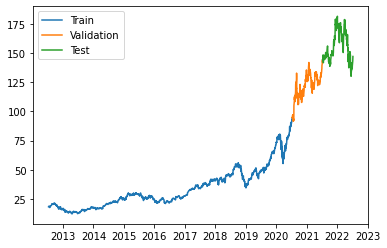

In [ ]:
# visualize these 3 datasets
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(["Train","Validation","Test"])

# Stage 2. Build the LSTM Neural Networks!

## 6.0 Import the modules

In [ ]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import layers

In [ ]:
model = Sequential()
model.add(layers.Input(shape = (3,1)))
model.add(layers.LSTM(64))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))

model.compile(loss="mse", optimizer = Adam(learning_rate = 0.001), metrics = ["mean_absolute_error"])
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=200)

Epoch 1/200
63/63 [==============================] - 2s 11ms/step - loss: 1133.2074 - mean_absolute_error: 28.5416 - val_loss: 11884.8857 - val_mean_absolute_error: 108.4750
Epoch 2/200
63/63 [==============================] - 0s 4ms/step - loss: 268.2664 - mean_absolute_error: 11.6935 - val_loss: 5504.8716 - val_mean_absolute_error: 73.4182
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 16.1796 - mean_absolute_error: 1.3555 - val_loss: 2103.9048 - val_mean_absolute_error: 44.6206
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 1.6069 - mean_absolute_error: 0.6199 - val_loss: 1487.2683 - val_mean_absolute_error: 37.1018
Epoch 5/200
63/63 [==============================] - 0s 5ms/step - loss: 0.9717 - mean_absolute_error: 0.5443 - val_loss: 1308.0743 - val_mean_absolute_error: 34.6154
Epoch 6/200
63/63 [==============================] - 0s 5ms/step - loss: 0.8836 - mean_absolute_error: 0.5624 - val_loss: 1148.9232 - val_mean_absolute_er

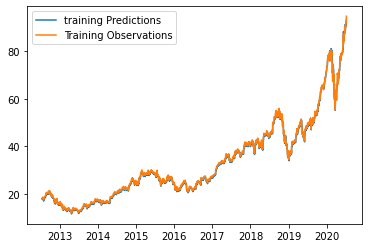

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.clf()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(["training Predictions", "Training Observations"])

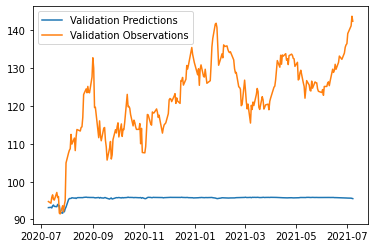

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(["Validation Predictions", "Validation Observations"])

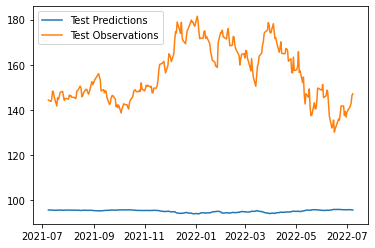

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(["Test Predictions", "Test Observations"])

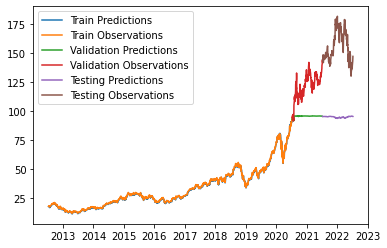

In [ ]:
# put all plot on the same figure
plt.clf()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(["Train Predictions", "Train Observations",
            "Validation Predictions", "Validation Observations",
            "Testing Predictions", "Testing Observations"])